# Datasets Notebook

In [1]:
#Imports
import pandas as pd
import numpy as np

import spacy
from spacy import displacy
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


#Visualizations
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

##### 1) Read and load the dataset

In [2]:
#Original Dataset
df_Original=pd.read_csv("tweets.csv")
#Augmented Techniques Datasets
df_BackTranslation=pd.read_csv("BackTranslationAugmentedData.csv")
df_SynonymReplacement=pd.read_csv("SynonymReplacementAugmentedData.csv")
df_GPT=pd.read_csv("GPT3.5AugmentedData.csv")
df_CharacterSwapping=pd.read_csv("CharacterSwapping.csv")
df_RandomDeletion=pd.read_csv("RandomDeletion.csv")

- Original Dataset

In [3]:
df_Original.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


- Back Translation as an Augmentation Technique Dataset

In [4]:
df_BackTranslation.head()

,Unnamed: 0,text,label
0,0,@VirginAmerica What @dhepburn said.,neutral
1,1,@VirginAmerica plus you've added commercials t...,positive
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,3,@VirginAmerica it's really aggressive to blast...,negative
4,4,@VirginAmerica and it's a really big bad thing...,negative


- Synonym Replacement as an Augmentation Technique Dataset

In [5]:
df_SynonymReplacement.head()

,Unnamed: 0,text,label
0,0,@VirginAmerica What @dhepburn said.,neutral
1,1,@VirginAmerica plus you've added commercials t...,positive
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,3,@VirginAmerica it's really aggressive to blast...,negative
4,4,@VirginAmerica and it's a really big bad thing...,negative


- GPT3.5 as an Augmentation Technique Dataset

In [6]:
df_GPT.head()

,Unnamed: 0,text,label
0,0,@VirginAmerica What @dhepburn said.,neutral
1,1,@VirginAmerica plus you've added commercials t...,positive
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,3,@VirginAmerica it's really aggressive to blast...,negative
4,4,@VirginAmerica and it's a really big bad thing...,negative


- Character Swapping as an Augmentation Technique Dataset

In [7]:
df_CharacterSwapping.head()

,Unnamed: 0,label,text
0,0,neutral,@VirginAmerica What @dhepburn said.
1,1,positive,@VirginAmerica plus you've added commercials t...
2,2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,3,negative,@VirginAmerica it's really aggressive to blast...
4,4,negative,@VirginAmerica and it's a really big bad thing...


- Random Deletion as an Augmentation Technique Dataset

In [8]:
df_RandomDeletion.head()

,Unnamed: 0,label,text
0,0,neutral,@VirginAmerica What @dhepburn said.
1,1,positive,@VirginAmerica plus you've added commercials t...
2,2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,3,negative,@VirginAmerica it's really aggressive to blast...
4,4,negative,@VirginAmerica and it's a really big bad thing...


##### 2) Explore the datasets, and Ploting Target Column Distribution

 1- Shape of each dataset

In [9]:
shape_data={'Original':df_Original.shape,'Back_Translation':df_BackTranslation.shape,
      'Synonym_Replacement':df_SynonymReplacement.shape,'GPT':df_GPT.shape,'Character_Swapping':df_CharacterSwapping.shape,'Random_Deletion':df_RandomDeletion.shape}
shape_dataframe=pd.DataFrame(shape_data,index=['Number of Rows','Number of Columns'])
shape_dataframe

,Original,Back_Translation,Synonym_Replacement,GPT,Character_Swapping,Random_Deletion
Number of Rows,14640,27534,27534,27534,27534,27534
Number of Columns,15,3,3,3,3,3


2- Checking for Null values/datatypes/Memory Usage

**** Original Dataset ****

In [10]:
df_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df_Original.isnull().apply(df_Original.value_counts).T

,False,True
tweet_id,14640.0,NaN
airline_sentiment,14640.0,NaN
airline_sentiment_confidence,14640.0,NaN
negativereason,9178.0,5462.0
negativereason_confidence,10522.0,4118.0
airline,14640.0,NaN
airline_sentiment_gold,40.0,14600.0
name,14640.0,NaN
negativereason_gold,32.0,14608.0
retweet_count,14640.0,NaN


- Removing columns that contain Null values :
           - 'negativereason'
           - 'negativereason_confidence'
           - 'airline_sentiment_gold'
           - 'negativereason_gold'
           - 'tweet_coord'
           - 'tweet_location'
           - 'user_timezone' 
- Removing Unnecessary columns
('airline_sentiment_confidence','airline', 'name','retweet_count','tweet_created')

In [12]:
columns_to_remove=[ 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']
df_Original.drop(columns=columns_to_remove, inplace=True)
df_Original.rename(columns={"airline_sentiment": 'label'}, inplace=True)
df_Original.head()

,tweet_id,label,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...


**** Augmentation Technique Datasets ****

In [13]:
df_BackTranslation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27534 entries, 0 to 27533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27534 non-null  int64 
 1   text        27534 non-null  object
 2   label       27534 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.5+ KB


In [14]:
df_SynonymReplacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27534 entries, 0 to 27533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27534 non-null  int64 
 1   text        27534 non-null  object
 2   label       27534 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.5+ KB


In [15]:
df_GPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27534 entries, 0 to 27533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27534 non-null  int64 
 1   text        27534 non-null  object
 2   label       27534 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.5+ KB


In [16]:
df_CharacterSwapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27534 entries, 0 to 27533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27534 non-null  int64 
 1   label       27534 non-null  object
 2   text        27534 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.5+ KB


In [17]:
df_RandomDeletion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27534 entries, 0 to 27533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27534 non-null  int64 
 1   label       27534 non-null  object
 2   text        27534 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.5+ KB


***All augmentation datasets have no null values.***

4- Describing the data using mean,std and ... for all data categorical and Non-categorical data

**** Original Dataset ****

In [18]:
df_Original.describe(include='all')

,tweet_id,label,text
count,1.464000e+04,14640,14640
unique,NaN,3,14427
top,NaN,negative,@united thanks
freq,NaN,9178,6
mean,5.692184e+17,NaN,NaN
std,7.791112e+14,NaN,NaN
min,5.675883e+17,NaN,NaN
25%,5.685592e+17,NaN,NaN
50%,5.694779e+17,NaN,NaN
75%,5.698905e+17,NaN,NaN


**** Augmentation Technique Datasets ****

In [19]:
df_BackTranslation.describe(include='all')

,Unnamed: 0,text,label
count,27534.000000,27534,27534
unique,NaN,25361,3
top,NaN,@AmericanAir thank you!,neutral
freq,NaN,22,9178
mean,13766.500000,NaN,NaN
std,7948.525492,NaN,NaN
min,0.000000,NaN,NaN
25%,6883.250000,NaN,NaN
50%,13766.500000,NaN,NaN
75%,20649.750000,NaN,NaN


In [20]:
df_SynonymReplacement.describe(include='all')

,Unnamed: 0,text,label
count,27534.000000,27534,27534
unique,NaN,26611,3
top,NaN,@SouthwestAir thank you!,neutral
freq,NaN,20,9178
mean,13766.500000,NaN,NaN
std,7948.525492,NaN,NaN
min,0.000000,NaN,NaN
25%,6883.250000,NaN,NaN
50%,13766.500000,NaN,NaN
75%,20649.750000,NaN,NaN


In [21]:
df_GPT.describe(include='all')

,Unnamed: 0,text,label
count,27534.000000,27534,27534
unique,NaN,24983,3
top,NaN,@Qantas Shoutout to Qantas for their dedicatio...,neutral
freq,NaN,19,9178
mean,13766.500000,NaN,NaN
std,7948.525492,NaN,NaN
min,0.000000,NaN,NaN
25%,6883.250000,NaN,NaN
50%,13766.500000,NaN,NaN
75%,20649.750000,NaN,NaN


In [22]:
df_CharacterSwapping.describe(include='all')

,Unnamed: 0,label,text
count,27534.000000,27534,27534
unique,NaN,3,27273
top,NaN,neutral,@united thanks
freq,NaN,9178,6
mean,13766.500000,NaN,NaN
std,7948.525492,NaN,NaN
min,0.000000,NaN,NaN
25%,6883.250000,NaN,NaN
50%,13766.500000,NaN,NaN
75%,20649.750000,NaN,NaN


In [23]:
df_RandomDeletion.describe(include='all')

,Unnamed: 0,label,text
count,27534.000000,27534,27534
unique,NaN,3,26279
top,NaN,neutral,@thanks
freq,NaN,9178,25
mean,13766.500000,NaN,NaN
std,7948.525492,NaN,NaN
min,0.000000,NaN,NaN
25%,6883.250000,NaN,NaN
50%,13766.500000,NaN,NaN
75%,20649.750000,NaN,NaN


5- Checking Number of Unique Values for each column

In [24]:
Nunique_data={'Original':df_Original.nunique(),'Back_Translation':df_BackTranslation.nunique(),
      'Synonym_Replacement':df_SynonymReplacement.nunique(),'GPT':df_GPT.nunique(),'Character_Swapping':df_CharacterSwapping.nunique(),'Random_Deletion':df_RandomDeletion.nunique()}
Nunique_dataframe=pd.DataFrame(Nunique_data)
Nunique_dataframe

,Original,Back_Translation,Synonym_Replacement,GPT,Character_Swapping,Random_Deletion
Unnamed: 0,NaN,27534.0,27534.0,27534.0,27534.0,27534.0
label,3.0,3.0,3.0,3.0,3.0,3.0
text,14427.0,25361.0,26611.0,24983.0,27273.0,26279.0
tweet_id,14485.0,NaN,NaN,NaN,NaN,NaN


- There are duplicated values in  column 'text' for all datasets

6- Checking data if balanced or Imbalanced

In [25]:
CheckBalanced_data={'Original':df_Original['label'].value_counts(),'Back_Translation':df_BackTranslation['label'].value_counts(),
      'Synonym_Replacement':df_SynonymReplacement['label'].value_counts(),'GPT':df_GPT['label'].value_counts(),'Character_Swapping':df_CharacterSwapping['label'].value_counts(),'Random_Deletion':df_RandomDeletion['label'].value_counts()}
CheckBalanced_dataframe=pd.DataFrame(CheckBalanced_data)
CheckBalanced_dataframe

,Original,Back_Translation,Synonym_Replacement,GPT,Character_Swapping,Random_Deletion
negative,9178,9178,9178,9178,9178,9178
neutral,3099,9178,9178,9178,9178,9178
positive,2363,9178,9178,9178,9178,9178


- The 3 classes are imbalanced only in the original dataset.

7- Ploting Target Column Distribution

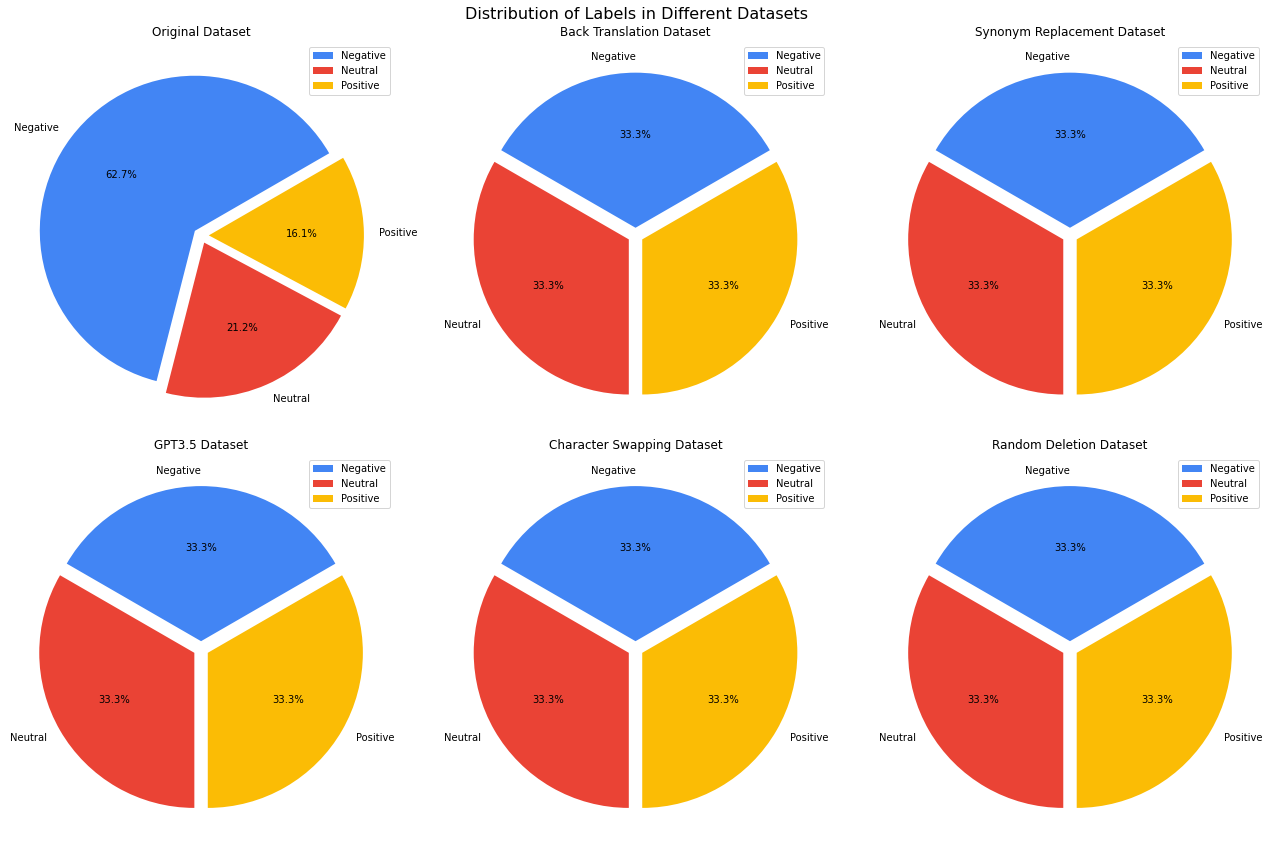

In [26]:
Titles = ['Original Dataset', 'Back Translation Dataset', 'Synonym Replacement Dataset',
          'GPT3.5 Dataset', 'Character Swapping Dataset', 'Random Deletion Dataset']

dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Labels in Different Datasets', fontsize=16)

axes = axes.flatten()

for index in range(6):
    colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
    axes[index].pie(dataset_list[index]['label'].value_counts(),
                    labels=['Negative', 'Neutral', 'Positive'],
                    colors=colors, autopct='%.1f%%', explode=(0.05, 0.05, 0.05),
                    startangle=30)

    axes[index].set_title(Titles[index])

    axes[index].legend(['Negative', 'Neutral', 'Positive'], loc='upper right')

plt.tight_layout()
plt.show()


##### 3) * Text PreProcessing

In [27]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
    dataset['length'] = dataset['text'].apply(lambda x: len(x))

In [28]:
#Displaying one of the datasets after adding the 'length' column
df_GPT.head()

,Unnamed: 0,text,label,length
0,0,@VirginAmerica What @dhepburn said.,neutral,35
1,1,@VirginAmerica plus you've added commercials t...,positive,72
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral,71
3,3,@VirginAmerica it's really aggressive to blast...,negative,126
4,4,@VirginAmerica and it's a really big bad thing...,negative,55


- Remove stopwords

In [29]:
#Remove stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [30]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
    #Removing Stopwords
    dataset["preprocessed_abstract"] = dataset["text"].apply(lambda text: remove_stopwords(text))

In [31]:
df_Original["preprocessed_abstract"] .head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus added commercials experien...
2    @VirginAmerica I today... Must mean I need tak...
3    @VirginAmerica really aggressive blast obnoxio...
4                  @VirginAmerica really big bad thing
Name: preprocessed_abstract, dtype: object

- Lemmatization

In [32]:
nlp = spacy.load('en_core_web_sm')
def lemmatization(text):
    doc=nlp(text)
    lemma_list=[word.lemma_ for word in doc]
    return ' '.join(lemma_list)

In [33]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
     #Lemmatization
    dataset["preprocessed_abstract"] = dataset["preprocessed_abstract"].apply(lambda text: lemmatization(text))

In [34]:
df_Original["preprocessed_abstract"] .head()

0                  @virginamerica what @dhepburn say .
1    @VirginAmerica plus add commercial experience ...
2    @virginamerica I today ... must mean I need ta...
3    @VirginAmerica really aggressive blast obnoxio...
4                  @VirginAmerica really big bad thing
Name: preprocessed_abstract, dtype: object

- Lowering and Removing punctuation

In [35]:
nlp = spacy.blank('en')
def spacy_preprocessor(doc):
    return [t.lower_ for t in nlp(doc) if 
          not t.is_punct and t.is_alpha]

def data_preprocessing(review):
    review = ' '.join(spacy_preprocessor(review))
    return review

In [36]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
    #Lowering and Removing punctuation
    dataset['preprocessed_abstract'] = dataset['preprocessed_abstract'].apply(data_preprocessing)
    #Calculating Length of text after cleaning
    dataset['length_after_cleaning'] = dataset['preprocessed_abstract'].apply(lambda x: len(x))

In [37]:
df_GPT.head()

,Unnamed: 0,text,label,length,preprocessed_abstract,length_after_cleaning
0,0,@VirginAmerica What @dhepburn said.,neutral,35,what say,8
1,1,@VirginAmerica plus you've added commercials t...,positive,72,plus add commercial experience tacky,36
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral,71,i today must mean i need take another trip,42
3,3,@VirginAmerica it's really aggressive to blast...,negative,126,really aggressive blast obnoxious entertainmen...,78
4,4,@VirginAmerica and it's a really big bad thing...,negative,55,really big bad thing,20


##### 4)**Visual Exploratory Analysis for column 'preprocessed_abstract'

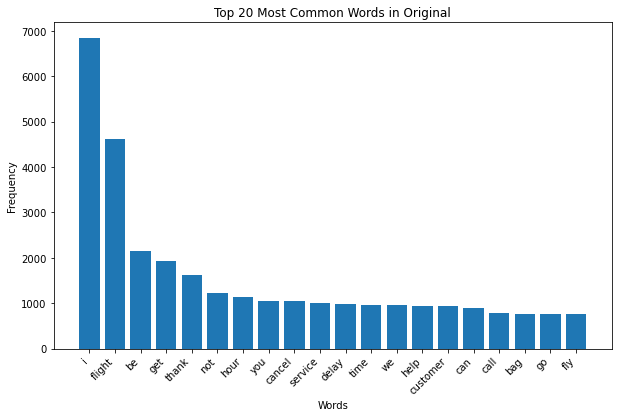

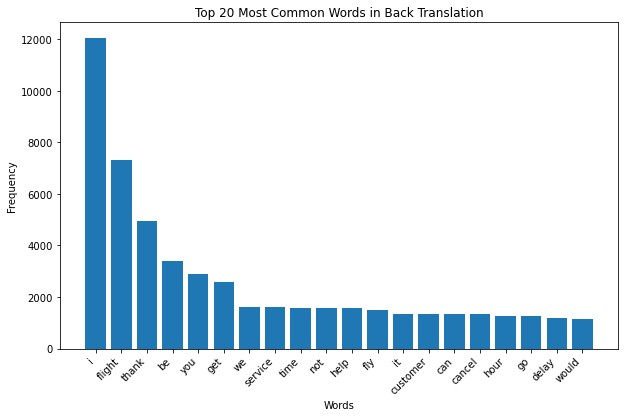

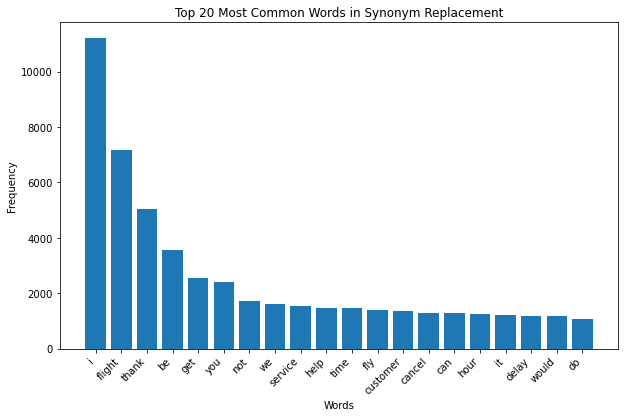

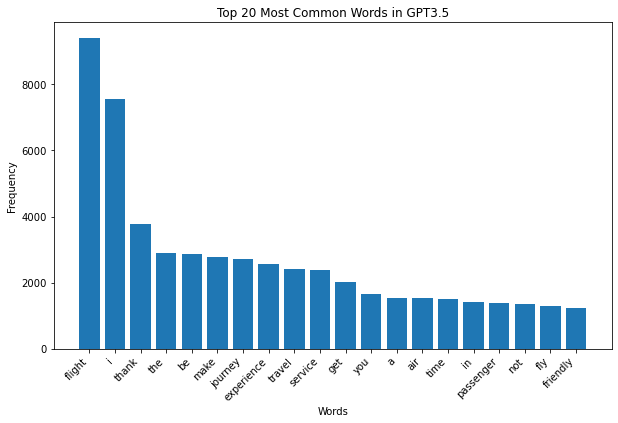

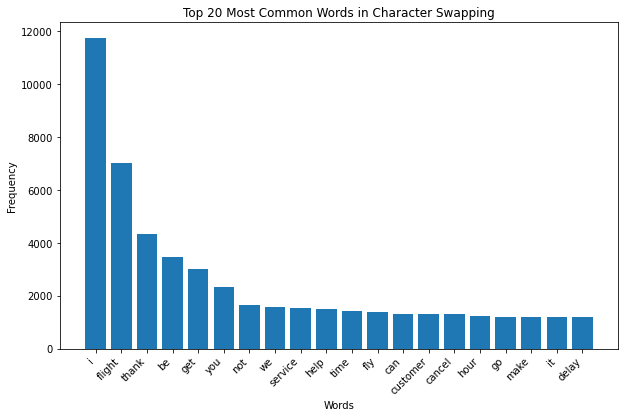

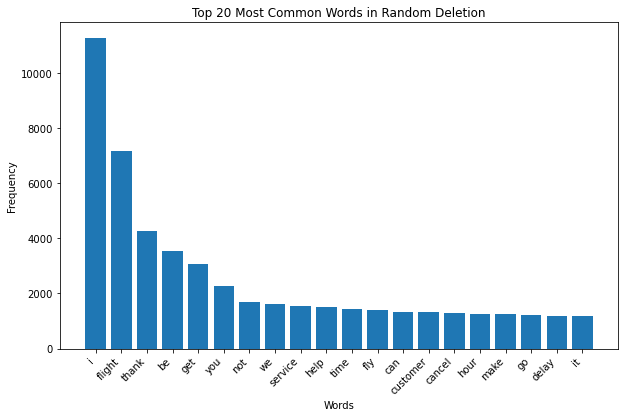

In [38]:
def plot_top_words(dataset_name,dataset, column_name='preprocessed_abstract', top_n=20):
    all_text = ' '.join(dataset[column_name].astype(str).tolist())
    tokens = word_tokenize(all_text)
    freq_dist = FreqDist(tokens)

    top_words = freq_dist.most_common(top_n)

    words, frequencies = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Common Words in {dataset_name}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

# Call the function for each dataset
plot_top_words('Original', df_Original)
plot_top_words('Back Translation', df_BackTranslation)
plot_top_words('Synonym Replacement', df_SynonymReplacement)
plot_top_words('GPT3.5', df_GPT)
plot_top_words('Character Swapping', df_CharacterSwapping)
plot_top_words('Random Deletion', df_RandomDeletion)


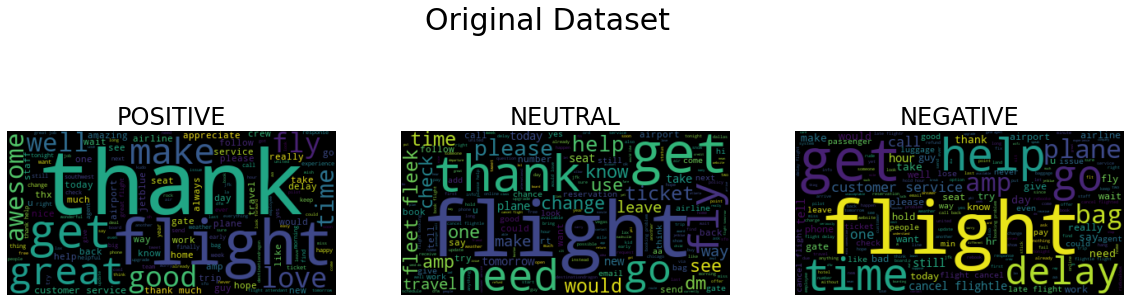

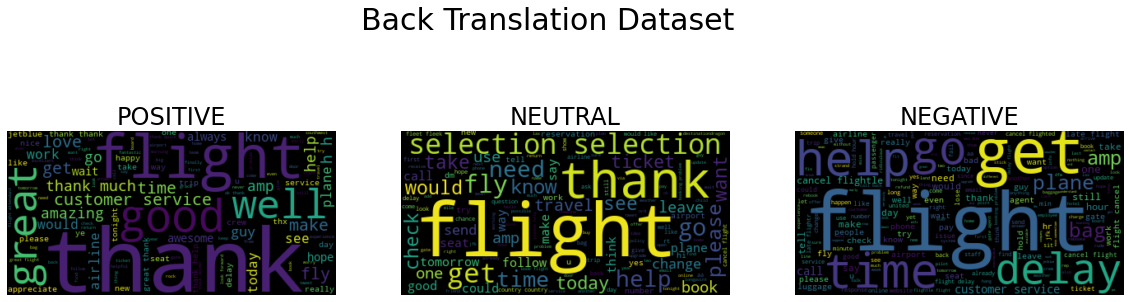

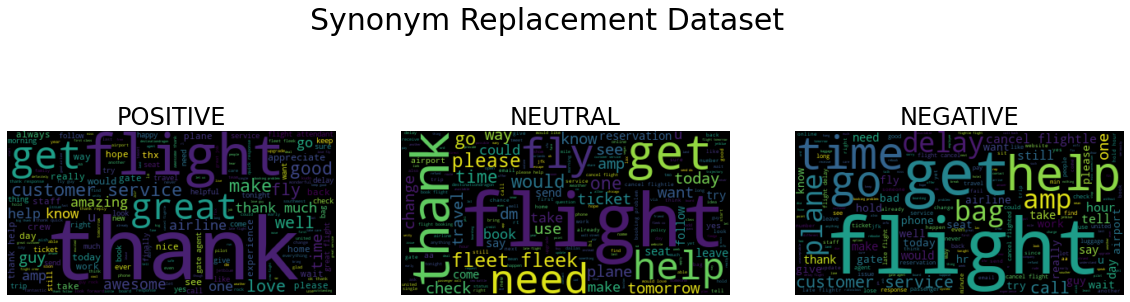

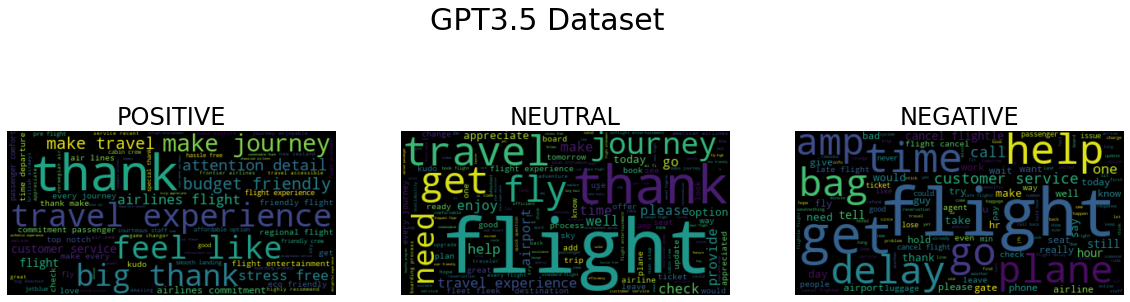

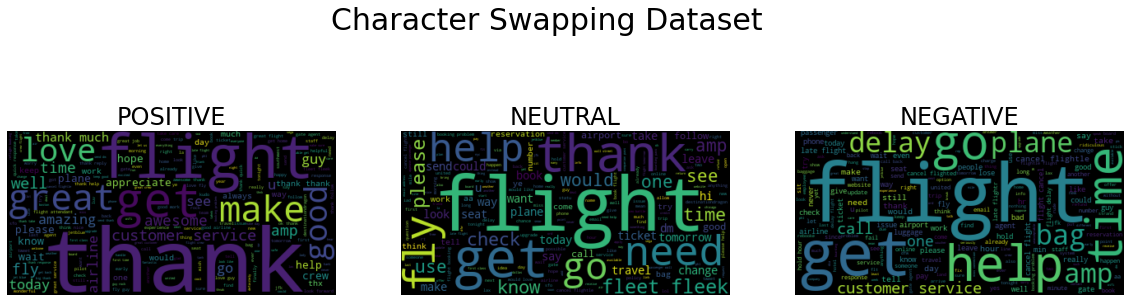

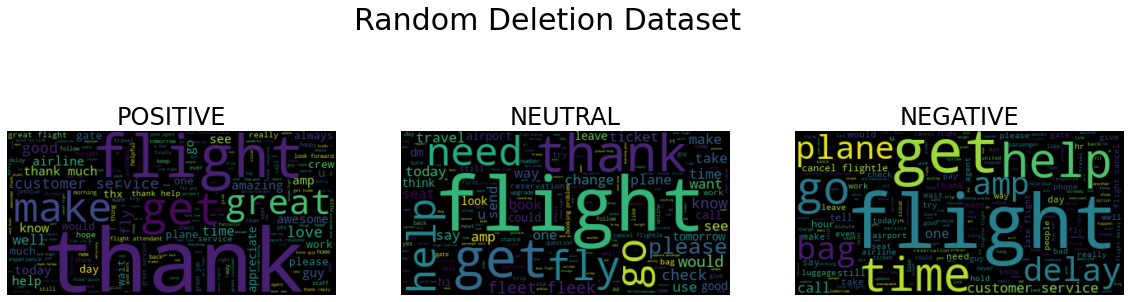

In [39]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
Titles = ['Original Dataset', 'Back Translation Dataset', 'Synonym Replacement Dataset',
          'GPT3.5 Dataset', 'Character Swapping Dataset', 'Random Deletion Dataset']
for index in range(6):
    # Create a WordCloud object
    wc = WordCloud(stopwords=set(list(STOPWORDS) + ['inside']), random_state=42)

    # List of sentiment categories
    sentiments = ['positive', 'neutral', 'negative']

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Generate and display word clouds for each sentiment category
    for i, sentiment in enumerate(sentiments):
        sub_data = dataset_list[index][dataset_list[index]['label'] == sentiment]
        op = wc.generate(' '.join(sub_data['preprocessed_abstract']))  # Assuming 'text' is the column containing the text data
        axes[i].imshow(op, interpolation='bilinear')
        axes[i].set_title(sentiment.upper(), fontsize=24)
        axes[i].axis('off')

    plt.suptitle(Titles[index], fontsize=30)
    plt.show()

##### 5) Preparing Data

- Tokenization

In [40]:
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
    dataset['tokenized_text'] = dataset['preprocessed_abstract'].apply(lambda x: word_tokenize(x))

In [41]:
df_Original.head()

,tweet_id,label,text,length,preprocessed_abstract,length_after_cleaning,tokenized_text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.,35,what say,8,"[what, say]"
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...,72,plus add commercial experience tacky,36,"[plus, add, commercial, experience, tacky]"
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...,71,i today must mean i need take another trip,42,"[i, today, must, mean, i, need, take, another,..."
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...,126,really aggressive blast obnoxious entertainmen...,78,"[really, aggressive, blast, obnoxious, enterta..."
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...,55,really big bad thing,20,"[really, big, bad, thing]"


- Transforming non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [42]:
label_map = {
    'negative': 0,
    'positive': 1,
    'neutral': 2
}
dataset_list = [df_Original, df_BackTranslation, df_SynonymReplacement, df_GPT, df_CharacterSwapping, df_RandomDeletion]
for dataset in dataset_list:
    dataset['label'] = dataset['label'].map(label_map)

##### 6) Saving Dataset Files

In [43]:
df_Original.to_csv('df_Original.csv', index=False)
df_BackTranslation.to_csv('df_BackTranslation.csv', index=True)
df_SynonymReplacement.to_csv('df_SynonymReplacement.csv', index=True)
df_GPT.to_csv('df_GPT.csv', index=True)
df_CharacterSwapping.to_csv('df_CharacterSwapping.csv', index=True)
df_RandomDeletion.to_csv('df_RandomDeletion.csv', index=True)